In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
df = pd.read_csv('/content/CreditCard_Dataset.csv')
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


###Mising Values

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

##Outlier Total Income



In [16]:
Q1 = df['Total_income'].quantile(0.25)
Q3 = df['Total_income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Total_income'] < (Q1 - 1.5 * IQR)) | (df['Total_income'] > (Q3 + 1.5 * IQR)))]
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


##Label Encoding

In [19]:
le = LabelEncoder()
for column in ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed',
               'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']:
    df[column] = le.fit_transform(df[column])
le

LabelEncoder()

##Normalisasi Data Numerik

In [21]:
scaler = StandardScaler()
df[['Total_income', 'Age', 'Years_employed']] = scaler.fit_transform(df[['Total_income', 'Age', 'Years_employed']])

In [22]:
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,0,2,29,-0.791308,1.286296,-0.396081,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,1.441544,0.732643,0.427881,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,1.632931,1.518156,-0.883496,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,1.441544,0.208499,-0.552965,4,1,1,1,0,0
5,5008819,1,1,1,0,0,0,0,0,2,17,-0.472329,0.420686,-0.370292,0,4,1,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,0.165628,1.081604,-0.798392,1,4,0,2,8,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,-0.791308,-0.033900,0.274436,0,4,1,1,12,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,-1.110287,0.730535,-0.143778,4,4,1,1,12,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,-0.153351,-0.841897,-0.313986,1,1,1,1,11,1


##EDA


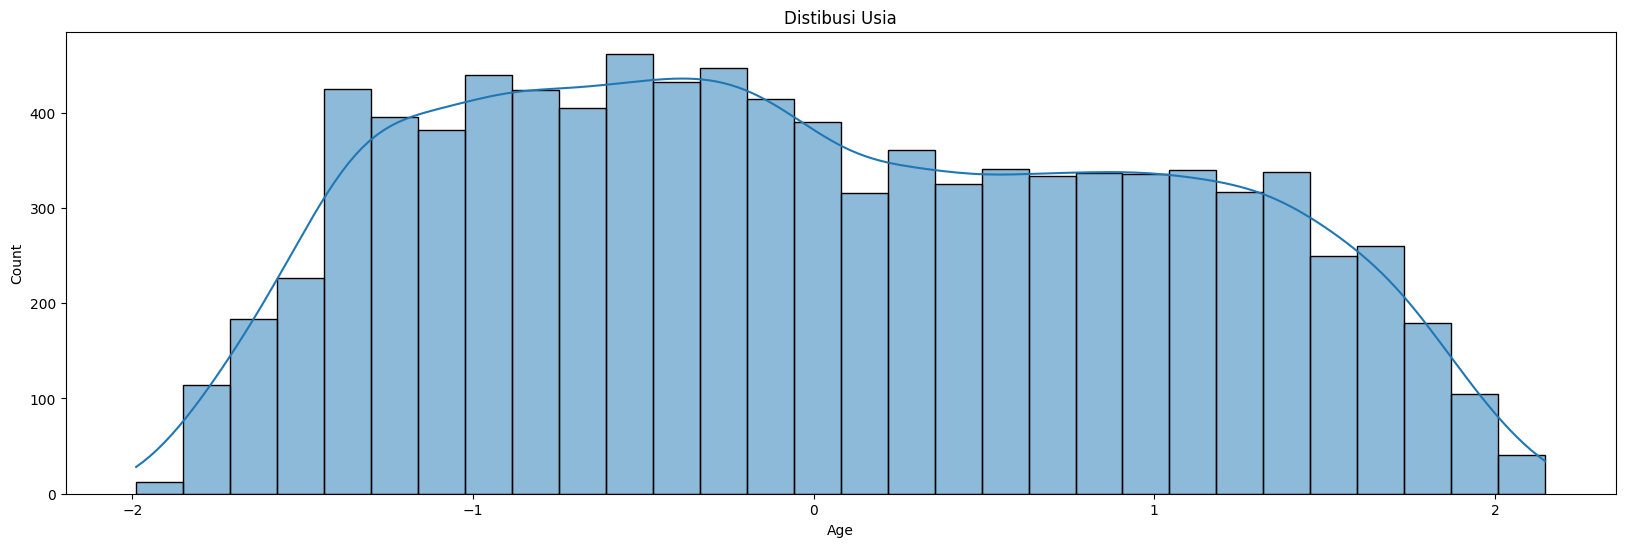

In [28]:
#Visualisasi Distribusi Variabel Numerik
plt.figure(figsize=(20, 6))
sns.histplot(df['Age'], bins= 30, kde=True)
plt.title('Distibusi Usia')
plt.show()

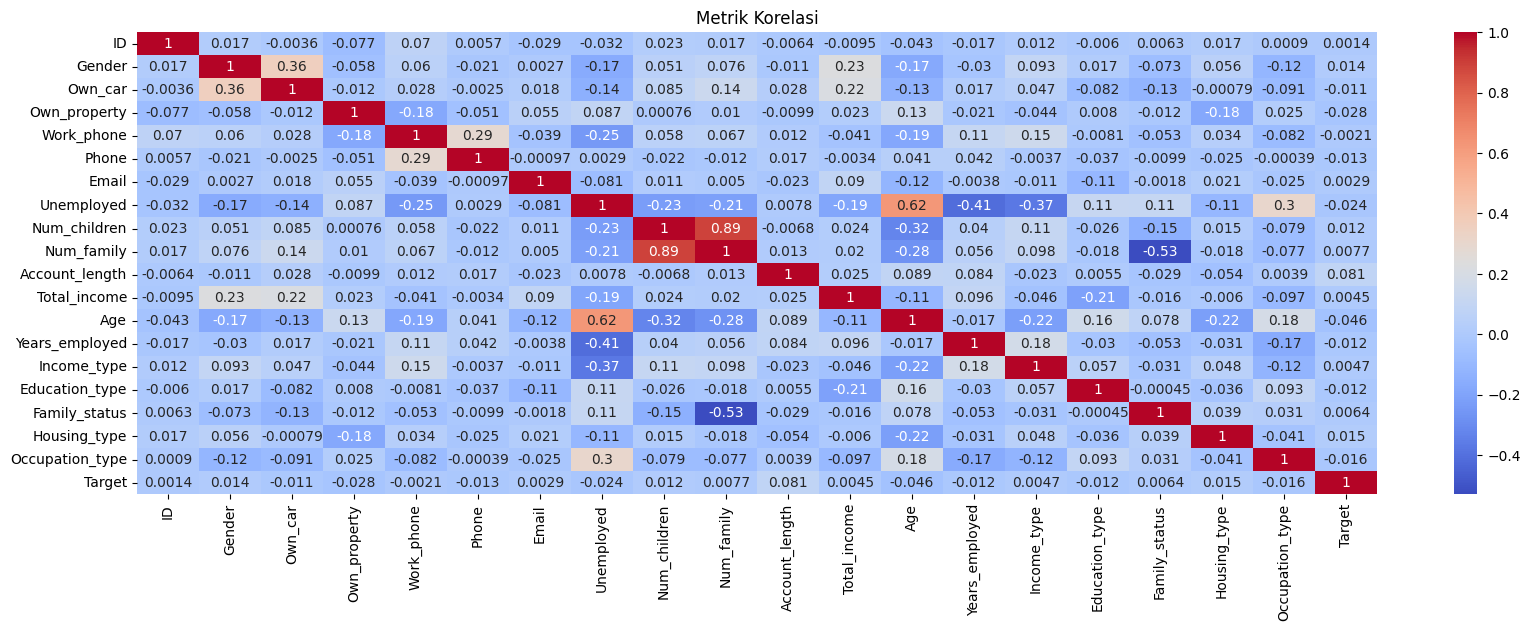

In [31]:
#Analisis Korelasi antar Variabel
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Metrik Korelasi')
plt.show()

In [33]:
Metrik_korelasi = df.corr()

In [36]:
high_corr_pairs = []

for col in Metrik_korelasi:
    for idx in Metrik_korelasi.index:
        if col != idx and abs(Metrik_korelasi.loc[idx, col]) > 0.7:
            high_corr_pairs.append((idx, col, Metrik_korelasi.loc[idx, col]))

# variabel dengan korelasi tinggi
for pair in high_corr_pairs:
    print(f"{pair[0]} dan {pair[1]} memiliki korelasi {pair[2]:.2f}")

Num_family dan Num_children memiliki korelasi 0.89
Num_children dan Num_family memiliki korelasi 0.89


###Analisis Faktor Kelayakan

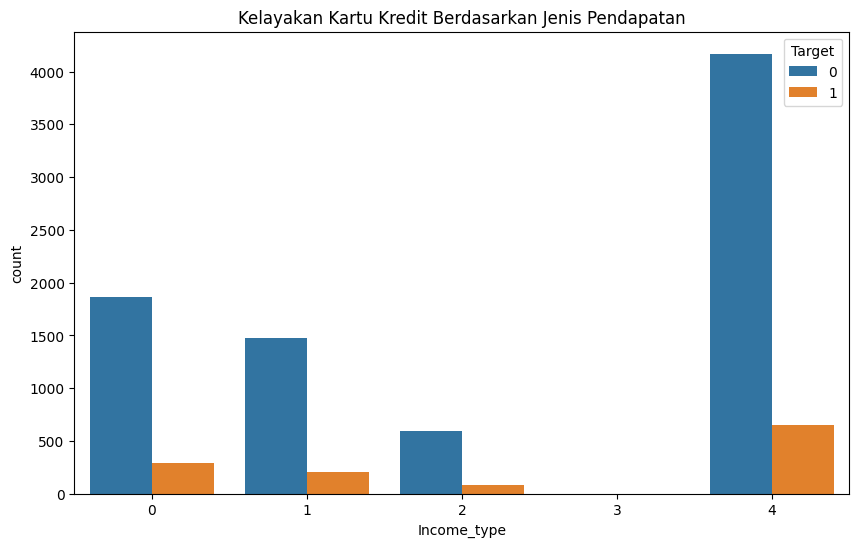

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'Income_type', hue='Target', data=df)
plt.title('Kelayakan Kartu Kredit Berdasarkan Jenis Pendapatan')
plt.show()

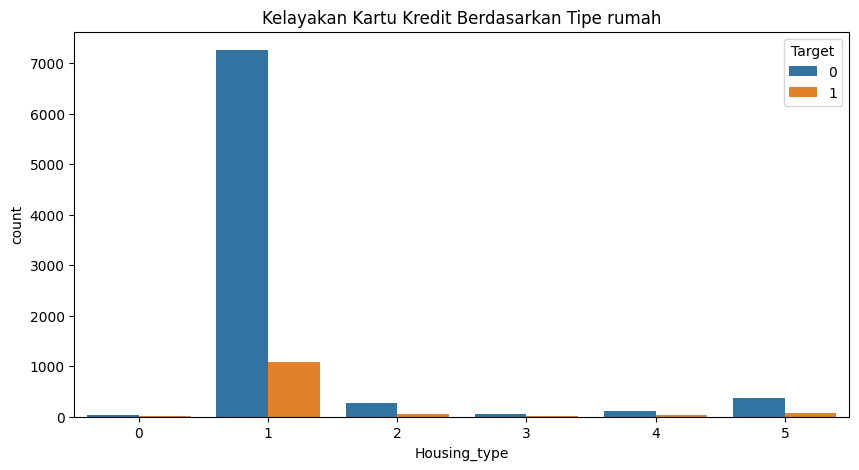

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Housing_type', hue='Target', data=df)
plt.title('Kelayakan Kartu Kredit Berdasarkan Tipe rumah')
plt.show()

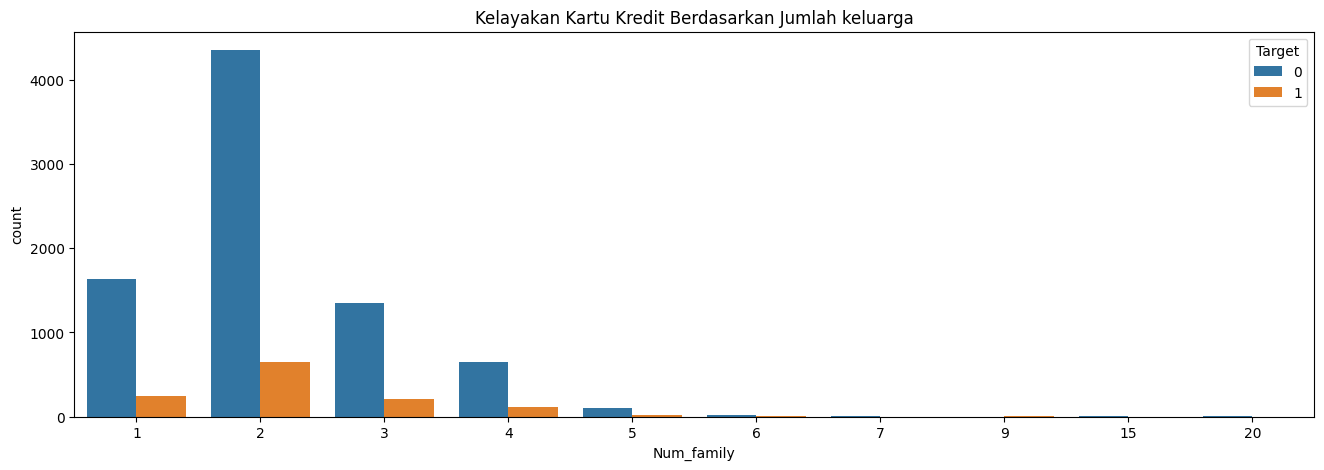

In [58]:
plt.figure(figsize=(16,5))
sns.countplot(x= 'Num_family', hue='Target', data=df)
plt.title('Kelayakan Kartu Kredit Berdasarkan Jumlah keluarga')
plt.show()

###Modeling

In [65]:
#Split Data
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Random forest Clasifier

In [64]:
model =RandomForestClassifier()
model.fit(X_train, y_train)

prediksi = model.predict(X_test)
print(confusion_matrix(y_test, prediksi))
print(classification_report(y_test, prediksi))
print(f'Accuracy: {accuracy_score(y_test, prediksi)}')


[[1596    1]
 [ 268    2]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1597
           1       0.67      0.01      0.01       270

    accuracy                           0.86      1867
   macro avg       0.76      0.50      0.47      1867
weighted avg       0.83      0.86      0.79      1867

Accuracy: 0.8559185859667916
